<a href="https://colab.research.google.com/github/HamsikaAS/DEL_LAB_1BM22AI052/blob/main/del_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import numpy as np
import pandas as pd

In [13]:
data = datasets.load_iris()
df1 = pd.DataFrame(data=data.data, columns=data.feature_names)
df1['target'] =  target = data.target
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
x = np.array(df1.iloc[:,:-1])
y = np.array(df1.iloc[:,-1])

In [18]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))
x_train,x_test,y_train,y_test = train_test_split(x,y_encoded,test_size=0.2,random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape = (4,)),
    tf.keras.layers.Dense(6,activation = 'relu'),
    tf.keras.layers.Dense(6,activation = 'relu'),
    tf.keras.layers.Dense(6,activation = 'relu'),
    tf.keras.layers.Dense(6,activation = 'relu'),
    tf.keras.layers.Dense(3,activation = 'softmax')
])

model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (788.00 B)

 Trainable params: 197 (788.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
h_gd = model1.fit(x_train, y_train, validation_split=0.2, batch_size=len(x_train), epochs=100,verbose=0)

In [25]:
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
h_sgd = model1.fit(x_train, y_train, validation_split=0.2, batch_size=1, epochs=100,verbose=0)

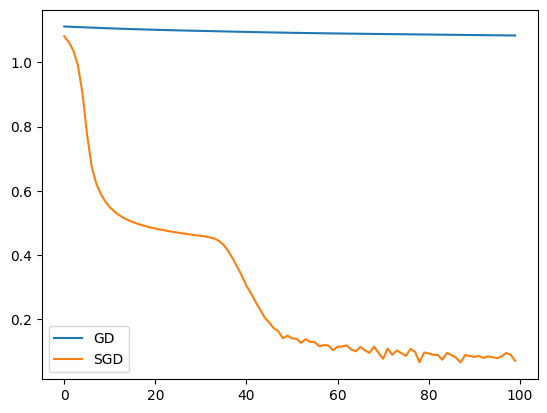

In [26]:
plt.plot(h_gd.history['loss'],label = 'GD')
plt.plot(h_sgd.history['loss'],label = 'SGD')
plt.legend()
plt.show()